### **Objective:**
####  
Perform exploratory Data Analysis and determine Training Labels.

    create a column for the class
    Standardize the data
    Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

    Find the method performs best using test data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import requests
import io

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

### Load the Data

In [3]:
# Load the dataframe

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL1)
if response.status_code == 200:
    SpaceX_data = pd.read_csv(io.StringIO(response.text))
else:
    print(f"HTTP GET request failed with status code: {response.status_code}")

In [5]:
SpaceX_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL2)
if response.status_code == 200:
    Data = pd.read_csv(io.StringIO(response.text))
else:
    print(f"HTTP GET request failed with status code: {response.status_code}")

## Preprocessing Data

In [7]:
Data.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [85]:
new_data = Data[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']]

In [86]:
noms_de_colonnes = new_data.columns.tolist()
noms_de_colonnes

['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']

In [88]:
Y = SpaceX_data['Class'].to_numpy()
Y = pd.Series(Y)

In [89]:
Y.tail()

85    1
86    1
87    1
88    1
89    1
dtype: int64

In [90]:
Data.tail(8)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
82,83.0,6104.959412,2.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
83,84.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
84,85.0,1600.000000,4.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
89,90.0,3681.000000,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [96]:
transform = preprocessing.StandardScaler()
X_data = transform.fit_transform(new_data)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=0.2, random_state=1)

In [98]:
Y_test.shape

(18,)

## Régression Logistique

In [99]:
parameters ={'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, parameters, cv=15)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [103]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7733333333333333


In [102]:
accuracy_lr = logreg_cv.score(X_test, Y_test)
print(f"Accuracy on the test data: {accuracy_lr}")

Accuracy on the test data: 0.7777777777777778


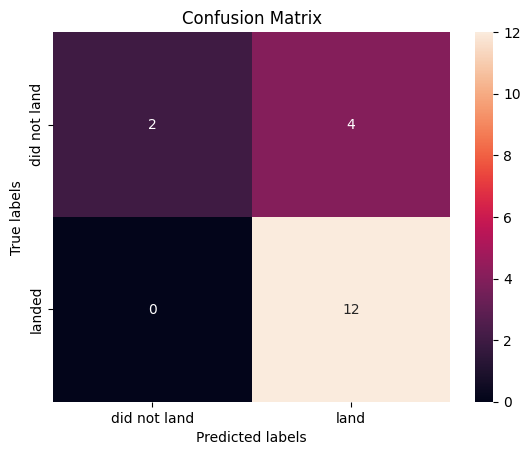

In [104]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [105]:
yhat = logreg_cv.predict(X_test)

print(yhat)
print(Y_test.head(90))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
58    1
78    1
43    1
55    1
87    1
74    0
60    0
52    1
46    0
39    1
40    1
31    1
69    1
27    0
38    1
68    1
10    0
2     0
dtype: int64


## Support Vector Machine

In [106]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [112]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.8303571428571429


In [113]:
accuracy_svm = svm_cv.score(X_test, Y_test)
print(f"Accuracy on the test data: {accuracy_svm}")

Accuracy on the test data: 0.9444444444444444


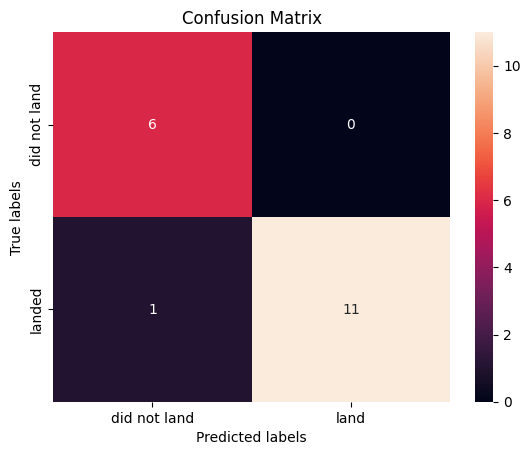

In [114]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [131]:
yhat = svm_cv.predict(X_data)[0]
yhat

0

In [124]:
import joblib
joblib.dump(svm_cv, "loan_svm.joblib")

['loan_svm.joblib']

## Decision Tree Classifier

In [115]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=15)
tree_cv.fit(X_train, Y_train)

c:\Users\ayyou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4860 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4860 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ayyou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ayyou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ayyou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [116]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy_tree :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy_tree : 0.8300000000000001


In [117]:
accuracy_tree = tree_cv.score(X_test, Y_test)
print(f"Accuracy_tree on the test data: {accuracy_tree}")

Accuracy_tree on the test data: 0.6666666666666666


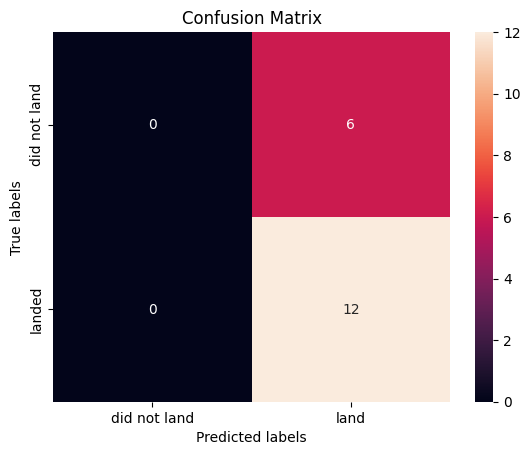

In [118]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## k Nearest Neighbors

In [120]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN_cv = GridSearchCV(KNN, parameters, cv=10)
KNN_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [121]:
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8196428571428571


In [122]:
accuracy_KNN = KNN_cv.score(X_test, Y_test)
print(f"Accuracy_tree on the test data: {accuracy_KNN}")

Accuracy_tree on the test data: 0.9444444444444444


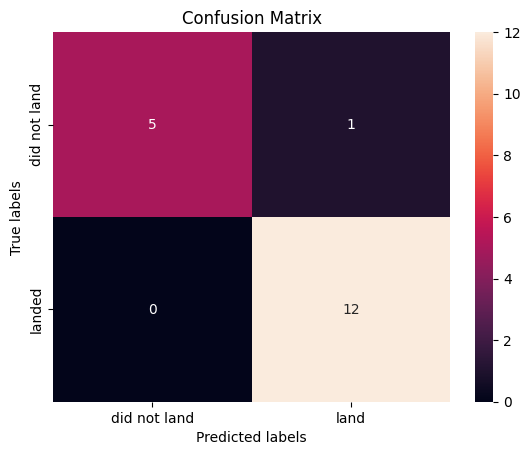

In [123]:
yhat = KNN_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Réseau de neurone

In [82]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [83]:
# Construire le modèle DNN

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Définir un rappel pour arrêter l'entraînement prématurément si la performance ne s'améliore pas
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [84]:
# Entraîner le modèle
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.3)

Epoch 1/100
50/50 [==============================] - 2s 7ms/step - loss: 0.7029 - accuracy: 0.5200 - val_loss: 0.6591 - val_accuracy: 0.6818
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.7800 - val_loss: 0.5810 - val_accuracy: 0.7273
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.9200 - val_loss: 0.5737 - val_accuracy: 0.7727
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.8643 - val_accuracy: 0.7273
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9800 - val_loss: 1.0377 - val_accuracy: 0.6818
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.1334 - val_accuracy: 0.7273
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.1981 - val_accuracy: 0.7273
Epoch 8/100
5

In [85]:
# Évaluer la performance sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Accuracy: {train_accuracy}")

3/3 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.9028
Test Accuracy: 0.8333333134651184
Train Accuracy: 0.9027777910232544


In [86]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 83.33%


In [87]:

def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

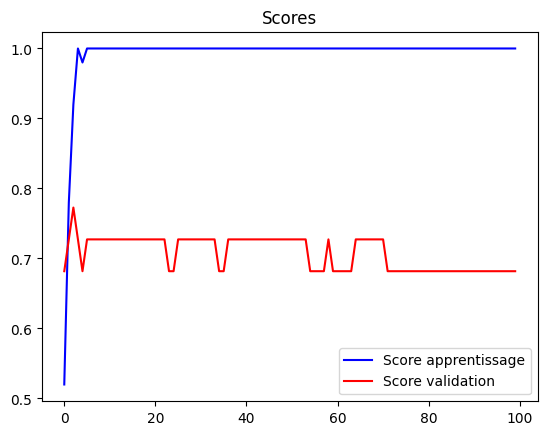

In [88]:
plot_scores(history)

In [89]:
# Vous pouvez utiliser le modèle entraîné pour faire des prédictions sur de nouvelles données
yhat = model.predict(X_test)
yhat

1/1 [==============================] - 0s 78ms/step


array([[9.9999744e-01],
       [9.9999893e-01],
       [9.5051795e-01],
       [9.9999475e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0696482e-02],
       [9.8403847e-01],
       [6.6366595e-01],
       [9.9999988e-01],
       [9.9999905e-01],
       [9.9999988e-01],
       [9.9989295e-01],
       [9.7845441e-01],
       [7.1555650e-01],
       [1.0000000e+00],
       [2.7611595e-06],
       [2.6904488e-07]], dtype=float32)

In [90]:
train = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=200, verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 808ms/step - loss: 0.6245 - accuracy: 0.9306 - val_loss: 1.2312 - val_accuracy: 0.8333
Epoch 2/50
1/1 [==============================] - 0s 61ms/step - loss: 0.4507 - accuracy: 0.9444 - val_loss: 0.8871 - val_accuracy: 0.8889
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.2158 - accuracy: 0.9722 - val_loss: 0.6718 - val_accuracy: 0.9444
Epoch 4/50
1/1 [==============================] - 0s 40ms/step - loss: 0.1212 - accuracy: 0.9861 - val_loss: 0.5319 - val_accuracy: 0.9444
Epoch 5/50
1/1 [==============================] - 0s 35ms/step - loss: 0.0865 - accuracy: 0.9861 - val_loss: 0.4542 - val_accuracy: 0.8889
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 0.0142 - accuracy: 0.9861 - val_loss: 0.4586 - val_accuracy: 0.7778
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.5032 - val_accuracy: 0.7778
Epoch 8/50
1/1 [==========

In [91]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))


Score : 88.89%
